# Singular Value Decomposition (SVD)

> SVD is not nearly as famous as it should be -- Gilbert Strang

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use( 'seaborn' )
# Disable jedi autocompleter
%config Completer.use_jedi = False

## Motivation

* The SVD is a cornerstone of computational science and engineering, and the numerical implementation of the SVD is both important and mathematically enlightening.  
* It provides a numerically stable matrix decomposition that can be used for a variety of purposes and is guaranteed to exist
* SVD generalizes the concept of the fast Fourier transform (FFT)
* SVD provides a systematic way to determine a low-dimensional approximation to high-dimensional data in terms of dominant patterns
* It is numerically stable and provides a hierarchical representation of the data in terms of a new coordinate system defined by dominant correlations within the data
* has many powerful applications beyond dimensionality reduction of high- dimensional data
* It is used to compute the pseudo-inverse of non-square matrices, provid- ing solutions to underdetermined or overdetermined matrix equations, **Ax** = **b**

## Definition

A singular value decomposition (SVD) of an $m \times n$ matrix $\textbf{A}$ expresses the matrix as the product of three "simple" matrices:
$$\textbf{ A = UΣV}^T,$$

where:  
1. $\textbf{U}$ is an $m \times m$ orthogonal matrix;
2. $\textbf{V}$ is an $n \times n$ orthogonal matrix;
3. $\textbf{Σ}$ is an $m \times n$ diagonal matrix with nonnegative entries, and with the diagonal entries sorted from high to low (as one goes "northwest" to "southeast")


<center>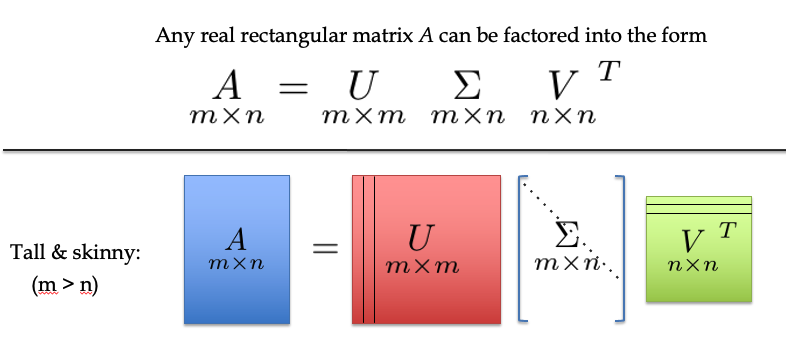</center>

* The columns of $\textbf{U}$ are called the *left singular vectors* of $\textbf{A}$ (these are $m$-vectors). 
* The rows of $\textbf{V}^T$ are the *right singular verctors* of $\textbf{A}$ (these are n-vectors).
* Thus with each singular vector (left or right) there is an associated singular value.
* The "first" or "top" singular vector refers to the one associated with the largest singular value, and so on.

## SVD Properties

<center>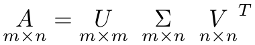</center>


$U$ and $V$ are unitary matrices with mutually orthonormal columns
$$U^TU = UU^T = I_m,$$
$$V^TV = VV^T = I_n,$$

These columns are called the left and right singular vectors
$$U = [ u_1 \dots u_m]~\text{ left singular vectors}$$
$$V = [ v_1 \dots v_n]~\text{ right singular vectors}$$

$\sum$ contains the singular values on the diagonal, in order: 
$$\sigma_1  \geqslant \sigma_2 \dots  \geqslant \sigma_{min\{m,n\}}$$
    which correpond to the left and right singular vectors:
$$Av_i = \sigma_iu_i, A^Tu_i = \sigma_iv_i, A =  \sum^{min\{m,n\}}_{i=1}\sigma i u_i v_i^T$$


## Geometric Interpretation of the SVD

For a vector $x \in \mathbb{R}^n$, the geometric interpretation of $Ax$:

1. Rotate $x$ by rotation matrix $V^T$
2. Scale the result along the coordinate axes
3. Either discard $n-m$ dimensions ($m<n$) or add zero-pad $m-n$ ($m>n$) to map to $\mathbb{R}^m$
4. Rotate the result by $U$

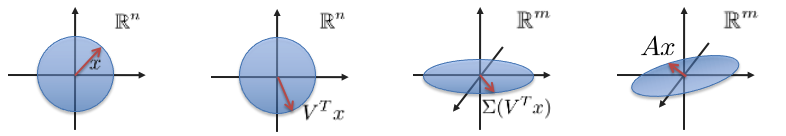


In [2]:
# Create a data matrix
A = np.array([[1, 0.3], [0.45, 1.2]]) 

# Compute full SVD
U, S, V = np.linalg.svd(A, full_matrices=True)

In [3]:
x = np.array([[-10, -10, 20, 20], [-10, 20, 20, -10]]).T 

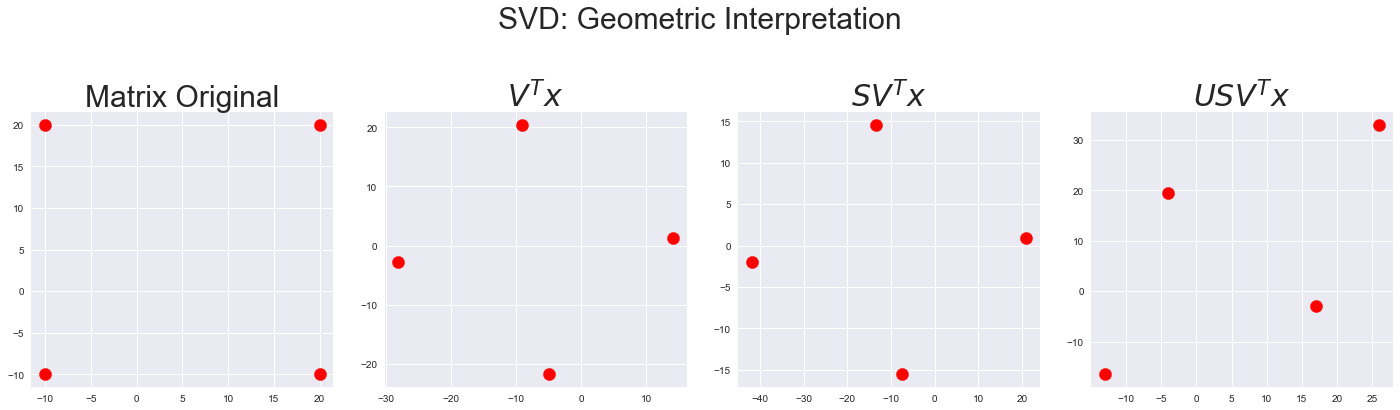

In [6]:
plt.rcParams['font.size'] = 25  
fig, ax = plt.subplots(1, 4, figsize=(20, 6)) 
fig.suptitle('SVD: Geometric Interpretation')


ax[0].scatter(x[:, 0], x[:, 1], color='red', s=150) 
ax[0].set_title('Matrix Original', fontsize=30) 

temp = x @ V.T

ax[1].scatter(temp[:, 0], temp[:, 1], color='red', s=150 ) 
ax[1].set_title('$V^Tx$', fontsize=30) 

temp = temp @ np.diag(S)  
ax[2].scatter(temp [:, 0], temp[:, 1], color='red', s= 150) 
ax[2].set_title('$SV^Tx$', fontsize=30) 

temp = temp @ U  
ax[3].scatter(temp[:, 0], temp[:, 1], color = 'red' , s= 150 ) 
ax[3].set_title('$USV^Tx$', fontsize=30) 

plt.tight_layout() 
plt.show () 